<a href="https://colab.research.google.com/github/teng-yu-an/Text-Similarity-Analysis-of-FinTech/blob/main/FinTech_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Similarity Analysis of FinTech development of various financial holding companies <br>
## 金融業各金控數位金融和金融科技發展 之文本相似度分析

- Abstract:<br>
在 [【人工智慧應用專題】語言學導向的NLP](https://www.youtube.com/watch?v=Z6KOlJ58Gfw)， 請到 [卓騰語言科技](https://www.droidtown.co/zh-tw/) 總經理 王文傑老師 介紹語言學導向的自然語言處理以及卓騰語言科技的產品。<br>
本專案實作目標為分析各家金控公司在數位金融發展的方向、產品上的差異，判斷方法為計算其文本相似度，並進一步針對各家文本做文字雲的視覺化呈現，觀察各家金控發展的重點。<br><br>

- 方法：<br>
Articut API 為卓騰語言科技之產品，利用語言學的角度頗析中文句法的規則去斷詞，並標記好POS taggint、Geo-Event Extraction、NER 等，<br>
欲使用Articut API 需在 [公司官網](https://www.droidtown.co/zh-tw/) 申請金鑰，若無則在username 與articut_key 輸入空字串，每日只有2000 字額度。<br>
參考程式碼：[Droidtown/NLP_Training/Unit04](https://github.com/Droidtown/NLP_Training/tree/main/Unit04)<br><br>

- 資料來源：<br>
各金控官網的數位金融發展介紹

In [1]:
!pip install ArticutAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 7.5 MB/s 
     |████████████████████████████████| 125 kB 34.5 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 240 kB 45.9 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 202 kB 47.6 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8186ebe8d64f5d7ef2e4e1151e735977ed4ee693cc57e063f26ec3a193fde159
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
from collections import Counter
from ArticutAPI import Articut
import json
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os

In [3]:
if __name__ == "__main__":
    username = "peter.w@droidtown.co" #這裡填入您在 https://api.droidtown.co 使用的帳號 email。若使用空字串，則預設使用每小時 2000 字的公用額度。
    apikey   = "Jp$Jnnh1KCGEmHvzJ3wmiCXoA4nraNp" #這裡填入您在 https://api.droidtown.co 登入後取得的 api Key。若使用空字串，則預設使用每小時 2000 字的公用額度。

    articut = Articut(username, apikey)

In [4]:
def wordExtractor(inputLIST, unify=True):
    '''
    配合 Articut() 的 .getNounStemLIST() 和 .getVerbStemLIST() …等功能，拋棄位置資訊，只抽出詞彙。
    '''
    resultLIST = []
    for i in inputLIST:
        if i == []:
            pass
        else:
            for e in i:
                resultLIST.append(e[-1])
    if unify == True:
        return sorted(list(set(resultLIST)))
    else:
        return sorted(resultLIST)

def counterCosineSimilarity(counter01, counter02):
    '''
    計算 counter01 和 counter02 兩者的餘弦相似度
    '''
    terms = set(counter01).union(counter02)
    dotprod = sum(counter01.get(k, 0) * counter02.get(k, 0) for k in terms)
    magA = math.sqrt(sum(counter01.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(counter02.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

def lengthSimilarity(counter01, counter02):
    '''
    計算 counter01 和 counter02 兩者在長度上的相似度
    '''

    lenc1 = sum(iter(counter01.values()))
    lenc2 = sum(iter(counter02.values()))
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.chdir('/content/drive/MyDrive/1111人工智慧應用專題')#{你的google雲端硬碟資料夾位址}

In [8]:
fintech = pd.read_csv('fintech.csv')
dictText = fintech.iloc[:5,0:2].set_index('Company').T.to_dict('list')

In [9]:
dictText.keys()

dict_keys(['玉山金控', '國泰金控', '中國信託金控', '第一金控', '兆豐金控'])

In [10]:
# 將自定義的字典FinTech_Dict 讀取出來
with open("FinTech_Dict.json", encoding="utf-8") as f:
    FinTech_Dict = json.loads(f.read())

In [11]:
company1 = '玉山金控'
company2 = '國泰金控'

Str1 = dictText[company1][0]
Str2 = dictText[company2][0]

# 將兩篇文本各自送入 articut.parse() 裡
ResultDICT1 = articut.parse(Str1, userDefinedDictFILE="FinTech_Dict.json")
ResultDICT2 = articut.parse(Str2, userDefinedDictFILE="FinTech_Dict.json")

#### 動詞的相似度<br>
由結果得知玉山金控和國泰金控，兩家在數位金融發展官網說明的動詞相似度為0.53。

In [12]:
# 取得「動詞」做為特徵列表
VerbLIST1 = articut.getVerbStemLIST(ResultDICT1)
# print(company1+"數位金融介紹動詞：")
# print(wordExtractor(VerbLIST1, unify=True))
# print("\n")
# print(company2+"數位金融介紹動詞：")
VerbLIST2 = articut.getVerbStemLIST(ResultDICT2)
# print(wordExtractor(VerbLIST2, unify=True))
# print("\n")

In [13]:
# 利用 Counter() 模組計算每個動詞出現的次數
COUNTER_1 = Counter(wordExtractor(VerbLIST1, unify=False))
COUNTER_2 = Counter(wordExtractor(VerbLIST2, unify=False))

# 計算 [文本 vs. 文本] 的餘弦相似度
SIM_1and2 = counterCosineSimilarity(COUNTER_1, COUNTER_2)

print(company1 + " v.s. " + company2 + " 的動詞餘弦相似度 : {}".format(SIM_1and2))


玉山金控 v.s. 國泰金控 的動詞餘弦相似度 : 0.5287530397865826


#### 名詞的相似度<br>
由結果得知玉山金控和國泰金控，兩家在數位金融發展官網說明的名詞相似度為0.28。

In [14]:
# 取得「名詞」做為特徵列表
NounLIST1 = articut.getNounStemLIST(ResultDICT1)
# print(company1+"數位金融介紹名詞：")
# print(wordExtractor(NounLIST1, unify=True))
# print("\n")
# print(company2+"數位金融介紹名詞：")
NounLIST2 = articut.getNounStemLIST(ResultDICT2)
# print(wordExtractor(NounLIST2, unify=True))
# print("\n")

In [15]:
# 利用 Counter() 模組計算每個動詞出現的次數
COUNTER_1 = Counter(wordExtractor(NounLIST1, unify=False))
COUNTER_2 = Counter(wordExtractor(NounLIST2, unify=False))

# 計算 [文本 vs. 文本] 的餘弦相似度
SIM_1and2 = counterCosineSimilarity(COUNTER_1, COUNTER_2)

print(company1 + " v.s. " + company2 + " 的名詞餘弦相似度 : {}".format(SIM_1and2))

玉山金控 v.s. 國泰金控 的名詞餘弦相似度 : 0.2768637761325161


#### 文字雲

In [16]:
# 為了在colab 畫文字雲上可以顯示中文
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/dict.txt.big -o /dev/null
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf -o /dev/null
font = 'SourceHanSansTW-Regular.otf'

In [28]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-24 16:23:03--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.197.113, 74.125.197.100, 74.125.197.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e3100g716og68o4b512jgll4v2djgbmv/1671898950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1b62de0f-ca25-4b37-b596-3da3bae18603 [following]
--2022-12-24 16:23:04--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e3100g716og68o4b512jgll4v2djgbmv/1671898950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1b62de0f-ca25-4b37-b596-3da3bae18603
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0k

In [17]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color = 'white',
                margin = 5, # 文字間距
                colormap = "Set2", # 字顏色
                font_path = font, # 設定字體
                max_words = 50, # 取多少文字在裡面
                min_font_size = 10, # 設定最小的字體大小
                width=1280, height = 720) # 解析

從 **玉山金控** 的數位金融文字雲中可以看出，<br>
其主要使用的動詞有：提升、服務、透過......<br>
而名詞有：顧客、交易、資訊、智慧、業務、品質......

Text(0.5, 1.0, '玉山金控 名詞 文字雲')

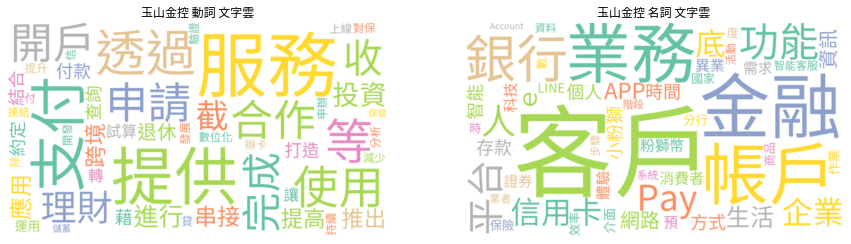

In [29]:
articutVerb = wordExtractor(inputLIST=VerbLIST1, 
                            unify=False)
articutNoun = wordExtractor(inputLIST=NounLIST1, 
                            unify=False)

wordcloud.generate_from_frequencies(Counter(articutVerb))
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear") # interpolation="bilinear" 畫質比較好
plt.title(f'{company1} 動詞 文字雲')

wordcloud.generate_from_frequencies(Counter(articutNoun))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company1} 名詞 文字雲')

從 **國泰金控** 的數位金融文字雲中可以看出，<br>
其主要使用的動詞有：提供、服務、打造、合作......<br>
而名詞有：客戶、平台、技術、資訊......

Text(0.5, 1.0, '國泰金控 名詞 文字雲')

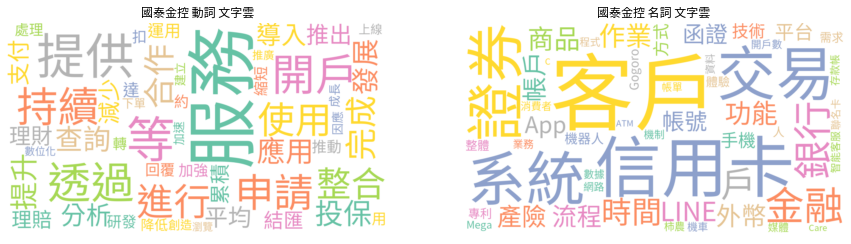

In [30]:
articutVerb = wordExtractor(inputLIST=VerbLIST2, 
                            unify=False)
articutNoun = wordExtractor(inputLIST=NounLIST2, 
                            unify=False)

wordcloud.generate_from_frequencies(Counter(articutVerb))
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company2} 動詞 文字雲')

wordcloud.generate_from_frequencies(Counter(articutNoun))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company2} 名詞 文字雲')

從 **中國信託金控** 的數位金融文字雲中可以看出，<br>
其主要使用的動詞有：透過、提供、發展、服務、完成、領先......<br>
而名詞有：金融、客戶體驗、實驗室、數據、技術......

Text(0.5, 1.0, '中國信託金控 名詞 文字雲')

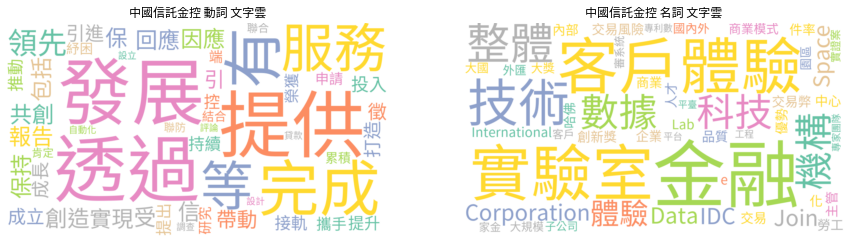

In [31]:
company = '中國信託金控'
Str = dictText[company][0]
ResultDICT = articut.parse(Str, userDefinedDictFILE="FinTech_Dict.json")

VerbLIST = articut.getVerbStemLIST(ResultDICT)
NounLIST = articut.getNounStemLIST(ResultDICT)

articutVerb = wordExtractor(inputLIST=VerbLIST, 
                            unify=False)
articutNoun = wordExtractor(inputLIST=NounLIST, 
                            unify=False)

wordcloud.generate_from_frequencies(Counter(articutVerb))
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 動詞 文字雲')

wordcloud.generate_from_frequencies(Counter(articutNoun))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 名詞 文字雲')

從 **第一金控** 的數位金融文字雲中可以看出，<br>
其主要使用的動詞有：服務、提供、透過、支付、申請......<br>
而名詞有：金融、客戶、帳戶、業務......

Text(0.5, 1.0, '第一金控 名詞 文字雲')

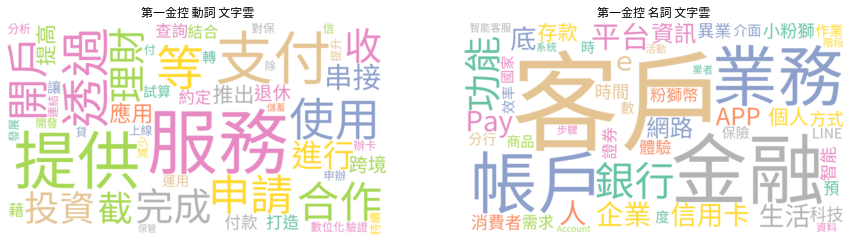

In [32]:
company = '第一金控'
Str = dictText[company][0]
ResultDICT = articut.parse(Str, userDefinedDictFILE="FinTech_Dict.json")

VerbLIST = articut.getVerbStemLIST(ResultDICT)
NounLIST = articut.getNounStemLIST(ResultDICT)

articutVerb = wordExtractor(inputLIST=VerbLIST, 
                            unify=False)
articutNoun = wordExtractor(inputLIST=NounLIST, 
                            unify=False)

wordcloud.generate_from_frequencies(Counter(articutVerb))
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 動詞 文字雲')

wordcloud.generate_from_frequencies(Counter(articutNoun))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 名詞 文字雲')

從 **兆豐金控** 的數位金融文字雲中可以看出，<br>
其主要使用的動詞有：服務、提供、開戶、申請......<br>
而名詞有：客戶、信用卡、銀行、證券、系統、交易......

Text(0.5, 1.0, '兆豐金控 名詞 文字雲')

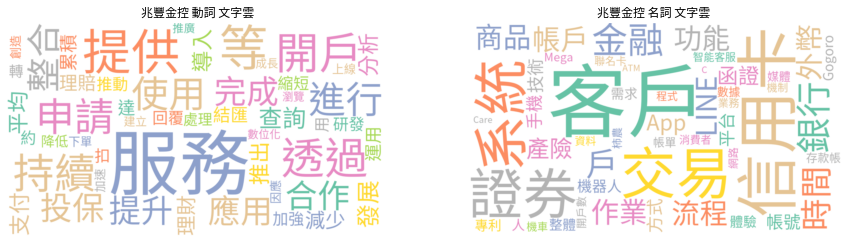

In [33]:
company = '兆豐金控'
Str = dictText[company][0]
ResultDICT = articut.parse(Str, userDefinedDictFILE="FinTech_Dict.json")

VerbLIST = articut.getVerbStemLIST(ResultDICT)
NounLIST = articut.getNounStemLIST(ResultDICT)

articutVerb = wordExtractor(inputLIST=VerbLIST, 
                            unify=False)
articutNoun = wordExtractor(inputLIST=NounLIST, 
                            unify=False)

wordcloud.generate_from_frequencies(Counter(articutVerb))
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 動詞 文字雲')

wordcloud.generate_from_frequencies(Counter(articutNoun))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f'{company} 名詞 文字雲')

將5家公司兩兩比較輸出成DataFrame

In [23]:
listCompany = list(dictText.keys())


In [24]:
listCompany

['玉山金控', '國泰金控', '中國信託金控', '第一金控', '兆豐金控']

In [25]:
similarityData = pd.DataFrame()
i = 0
while (i < len(listCompany)):
    for k in range(i+1, len(listCompany)):
        Str1 = dictText[listCompany[i]][0]
        Str2 = dictText[listCompany[k]][0]
        ResultDICT1 = articut.parse(Str1, userDefinedDictFILE="FinTech_Dict.json")
        ResultDICT2 = articut.parse(Str2, userDefinedDictFILE="FinTech_Dict.json")    
        VerbLIST1 = articut.getVerbStemLIST(ResultDICT1)
        VerbLIST2 = articut.getVerbStemLIST(ResultDICT2)
        COUNTER_1 = Counter(wordExtractor(VerbLIST1, unify=False))
        COUNTER_2 = Counter(wordExtractor(VerbLIST2, unify=False))
        SIM_Verb = counterCosineSimilarity(COUNTER_1, COUNTER_2)
        
        NounLIST1 = articut.getNounStemLIST(ResultDICT1)
        NounLIST2 = articut.getNounStemLIST(ResultDICT2)
        COUNTER_1 = Counter(wordExtractor(NounLIST1, unify=False))
        COUNTER_2 = Counter(wordExtractor(NounLIST2, unify=False))
        SIM_Noun = counterCosineSimilarity(COUNTER_1, COUNTER_2)

        similarityData = pd.concat([similarityData,
                                        pd.DataFrame({
                                            '公司': [listCompany[i]],
                                            '對比公司': [listCompany[k]],
                                            '動詞相似度': [SIM_Verb],
                                            '名詞相似度': [SIM_Noun]
                                        })])
    i+=1


由結果發現，**第一金控** 和 **兆豐金控** 不論是在動詞或名詞的相似度上都很高，<br>
動詞相似度為0.76，在除了各家都很頻繁提到的「服務、提供」詞彙之外，兩家所使用的其他動詞也很接近；<br>
名詞相似度為0.60，主要著重在「客戶、銀行、信用卡」等詞彙，可能兩家金控在數位金融的發展上，重點方向在提供客戶數位銀行帳戶的服務。<br>

在相似度上，各家金控的動詞相似度都差異不算太大，但在名詞相似度上就有高低上的差異，<br>
其中，名詞相似度最低的是 **玉山金控** 和 **中國信託金控**，為0.17。

In [26]:
similarityData

,公司,對比公司,動詞相似度,名詞相似度
0,玉山金控,國泰金控,0.528753,0.276864
0,玉山金控,中國信託金控,0.411680,0.173446
0,玉山金控,第一金控,0.553442,0.260694
0,玉山金控,兆豐金控,0.572065,0.316975
0,國泰金控,中國信託金控,0.489896,0.373002
0,國泰金控,第一金控,0.622866,0.503181
0,國泰金控,兆豐金控,0.642054,0.485822
0,中國信託金控,第一金控,0.440836,0.274120
0,中國信託金控,兆豐金控,0.465087,0.246530
0,第一金控,兆豐金控,0.765334,0.640268


In [27]:
similarityData.to_excel('similarity_output.xlsx', index=False)
